# Load Data 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

X_train = np.load('data/X_train.npy')
X_test = np.load('data/X_test.npy')
y_train = np.load('data/y_train.npy')
y_test = np.load('data/y_test.npy')
max_length = int(np.load('data/max.npy'))

In [2]:
# Create plots 
def create_plots(sample):
    '''
    :param rows: rows from ranges of taget values 
    :param data: data frame to use
    :return: plot of sigals, cwt and target response 
    '''

    plt.figure(figsize=(25,5))

    plt.subplot(1,4,1)
    plt.plot(X_train[sample, :, 0])

    plt.subplot(1,4,2)
    plt.plot(X_train[sample, :, 1])

    plt.subplot(1,4,3)
    plt.plot(X_train[sample, :, 2]) 
    
    plt.subplot(1,4,4)
    plt.text(0.35, 0.5, y_train[sample], dict(size=30))

    plt.show()           

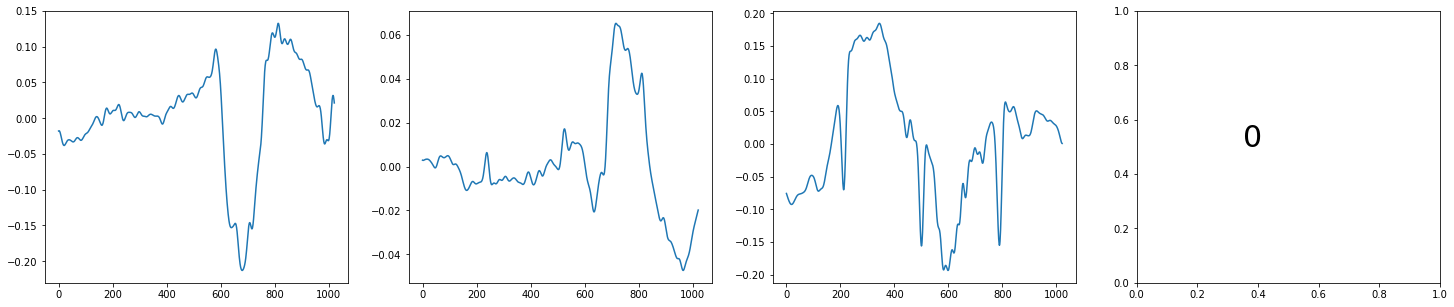

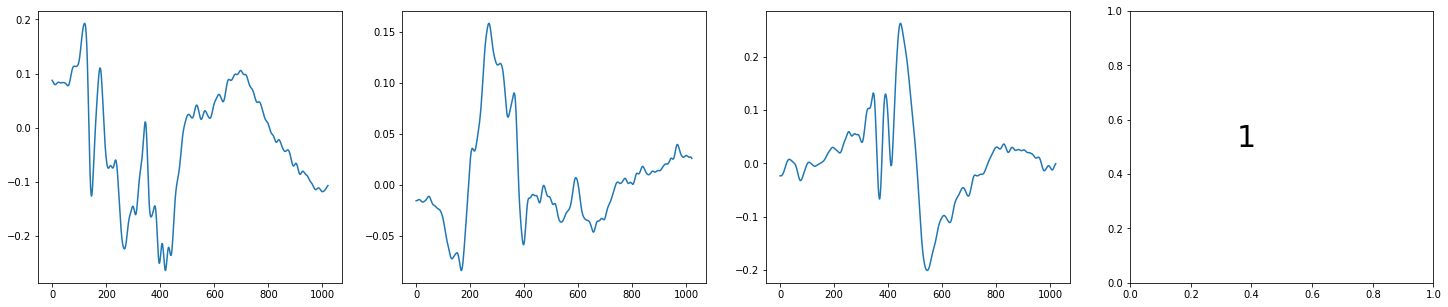

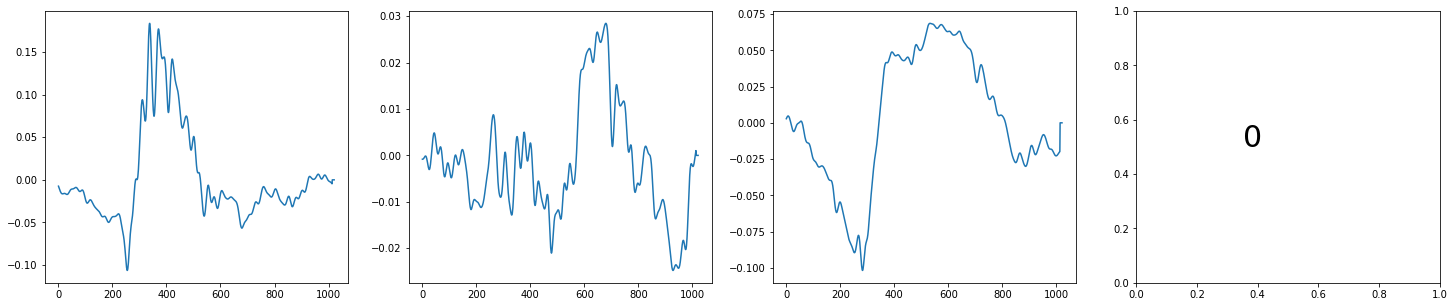

In [7]:
for i in [21,22,23]:
    create_plots(i)

In [6]:
if len(set(y_train)) ==  2:
    num_classes = 2
    activation = 'sigmoid'
    loss = 'binary_crossentropy'
    output = 1
else:
    num_classes = 10
    y_train = np_utils.to_categorical(y_train, num_classes)
    y_test = np_utils.to_categorical(y_test, num_classes)
    activation = 'softmax'
    loss = 'categorical_crossentropy'
    output = 10

# LSTM 

In [8]:
from keras.layers import LSTM
from keras import optimizers
from keras import layers
from keras import models
from keras.callbacks import History 
from keras.utils import np_utils
history = History()


batch_size = 32
epochs = 20

model = models.Sequential()
model.add(LSTM(64, input_shape = (max_length, X_train.shape[-1])))
model.add(layers.Dense(output, activation=activation))

model.compile(loss=loss,
              optimizer= optimizers.Adam(lr =0.001),
              metrics=['accuracy'])


model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, y_test),
          callbacks=[history])

train_score = model.evaluate(X_train, y_train, verbose=0)
print('Train loss: {}, Train accuracy: {}'.format(train_score[0], train_score[1]))
test_score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss: {}, Test accuracy: {}'.format(test_score[0], test_score[1]))

/home/rommeltf/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Train on 412 samples, validate on 46 samples
Epoch 1/20
412/412 [==============================] - 29s 70ms/step - loss: 0.6918 - acc: 0.5388 - val_loss: 0.6916 - val_acc: 0.5217
Epoch 2/20
412/412 [==============================] - 27s 66ms/step - loss: 0.6833 - acc: 0.5922 - val_loss: 0.6884 - val_acc: 0.5435
Epoch 3/20
412/412 [==============================] - 27s 66ms/step - loss: 0.6630 - acc: 0.6092 - val_loss: 0.6856 - val_acc: 0.6304
Epoch 4/20
412/412 [==============================] - 27s 66ms/step - loss: 0.6535 - acc: 0.6141 - val_loss: 0.6921 - val_acc: 0.4783
Epoch 5/20
412/412 [==============================] - 27s 66ms/step - loss: 0.6548 - acc: 0.6068 - val_loss: 0.6853 - val_acc: 0.6087
Epoch 6/20
412/412 [==============================] - 27s 67ms/step - loss: 0.6503 - acc: 0.6189 - val_loss: 0.7001 - val_acc: 0.4783
Epoch 7/20
412/412 [==============================] - 27s 66ms/step - loss: 0.6517 - acc: 0.6019 - val_loss: 0.6964 - val_acc: 0.5652
Epoch 8/20
412/41

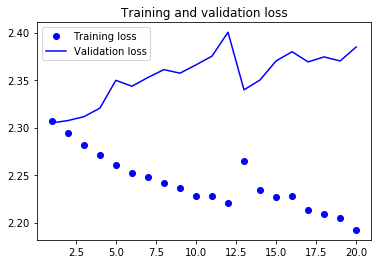

In [79]:
### Plot Losss
def plot_loss():
    acc = history.history['acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)
    plt.figure()
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()

plot_loss()

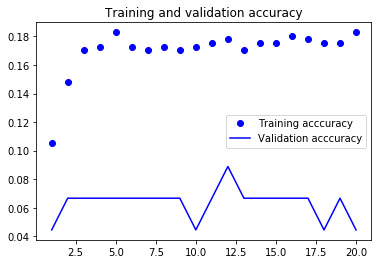

In [80]:
### Plot accuracy 

def plot_accuracy():
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    epochs = range(1, len(acc) + 1)
    plt.figure()
    plt.plot(epochs, acc, 'bo', label='Training acccuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation acccuracy')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.show()
    
plot_accuracy()

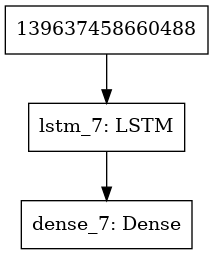

In [39]:
import pydot
from IPython.display import Image
from keras.utils import plot_model
plot_model(model, to_file='lstm.png')
Image(filename='lstm.png') 

In [82]:
#Test Data 

from sklearn.metrics import classification_report
import numpy as np

if len(set(y_train)) >  2:
    y_test = np.argmax(y_test, axis=1) # Convert one-hot to index
y_pred = model.predict_classes(X_test)
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00         4
          1       0.00      0.00      0.00         5
          2       0.00      0.00      0.00         3
          3       0.05      0.67      0.09         3
          4       0.00      0.00      0.00         5
          5       0.00      0.00      0.00         6
          6       0.00      0.00      0.00         5
          7       0.00      0.00      0.00         7
          8       0.00      0.00      0.00         4
          9       0.00      0.00      0.00         3

avg / total       0.00      0.04      0.01        45



/home/rommeltf/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Bidirectional LSTM

In [16]:
from keras.layers import Bidirectional
history = History()

batch_size = 32
epochs = 10 

model = models.Sequential()
model.add(Bidirectional(LSTM(32), input_shape = (max_length, X_train.shape[-1])))
model.add(layers.Dense(1, activation=activation))

model.compile(loss=loss,
              optimizer= optimizers.Adam(lr =0.01),
              metrics=['accuracy'])


model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, y_test),
          callbacks=[history])

train_score = model.evaluate(X_train, y_train, verbose=0)
print('Train loss: {}, Train accuracy: {}'.format(train_score[0], train_score[1]))
test_score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss: {}, Test accuracy: {}'.format(test_score[0], test_score[1]))

Train on 412 samples, validate on 46 samples
Epoch 1/10
412/412 [==============================] - 47s 114ms/step - loss: 0.6972 - acc: 0.4709 - val_loss: 0.6904 - val_acc: 0.4783
Epoch 2/10
412/412 [==============================] - 45s 110ms/step - loss: 0.6979 - acc: 0.5534 - val_loss: 0.7005 - val_acc: 0.4565
Epoch 3/10
412/412 [==============================] - 45s 109ms/step - loss: 0.6778 - acc: 0.6019 - val_loss: 0.6910 - val_acc: 0.4783
Epoch 4/10
412/412 [==============================] - 45s 109ms/step - loss: 0.6670 - acc: 0.5971 - val_loss: 0.6799 - val_acc: 0.5870
Epoch 5/10
412/412 [==============================] - 45s 109ms/step - loss: 0.6588 - acc: 0.6141 - val_loss: 0.6981 - val_acc: 0.4783
Epoch 6/10
412/412 [==============================] - 45s 109ms/step - loss: 0.6584 - acc: 0.6068 - val_loss: 0.6997 - val_acc: 0.4783
Epoch 7/10
412/412 [==============================] - 45s 109ms/step - loss: 0.6614 - acc: 0.6189 - val_loss: 0.7846 - val_acc: 0.4565
Epoch 8/10

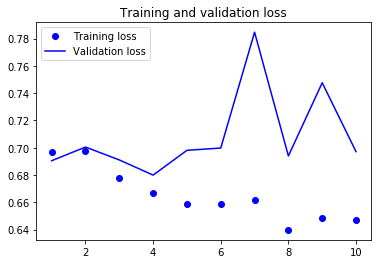

In [17]:
plot_loss()

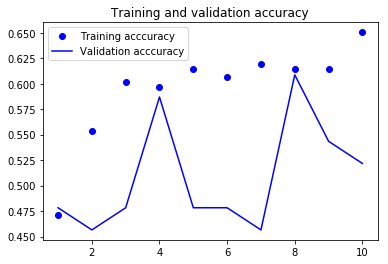

In [18]:
plot_accuracy()

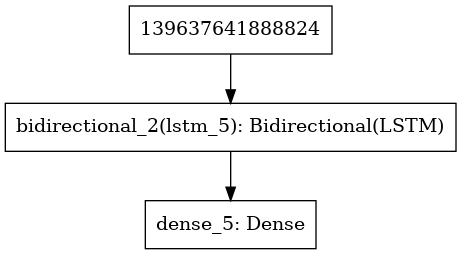

In [19]:
plot_model(model, to_file='lstm.png')
Image(filename='lstm.png') 

In [20]:
if len(set(y_train)) >  2:
    y_test = np.argmax(y_test, axis=1) # Convert one-hot to index
y_pred = model.predict_classes(X_test)
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.60      0.83      0.69       213
          1       0.69      0.40      0.50       199

avg / total       0.64      0.62      0.60       412

